# Mushroom Classification

## Problem Statement

The overarching objective of this project is to develop a robust and accurate machine learning model capable of predicting the edibility status of mushrooms, discerning between poisonous and edible varieties, leveraging a comprehensive set of features that encapsulate various attributes such as cap shape, cap surface, gill characteristics, stem dimensions, veil properties, and spore print color. Through extensive analysis and predictive modeling, the goal is to create a reliable tool for differentiating between mushroom types, ensuring the safety of individuals engaging in mushroom foraging or related activities.

### Dataset Info

- Class ---poisonous=p, edibile=e (binary)
- Variable Information:   (n: nominal, m: metrical; nominal values as sets of values)
- cap-diameter (m):float number in cm
- cap-shape (n):  bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
- cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e
- cap-color (n):  brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k
- does-bruise-bleed (n): bruises-or-bleeding=t,no=f
- gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?
- gill-spacing (n):   close=c, distant=d, none=f
- gill-color (n):  see cap-color + none=f
- stem-height (m): float number in cm
- stem-width (m):	float number in mm  
- stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r
- stem-surface (n): see cap-surface + none=f
- stem-color (n): see cap-color + none=f
- veil-type (n):   partial=p, universal=u
- veil-color (n): see cap-color + none=f
- has-ring (n):   ring=t, none=f
- ring-type (n):   cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
- spore-print-color (n):   see cap color
- habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
- season (n): Sring=s, summer=u, autumn=a, winter=w


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline
pd.set_option('display.max_column',None)
pd.set_option("display.max_rows",None)

## Importing DataSet

In [3]:
df = pd.read_csv('dataset.csv')

<Axes: xlabel='class', ylabel='cap-diameter'>

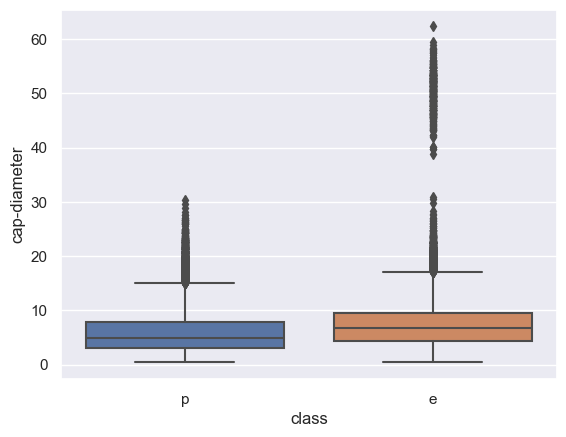

In [7]:
sns.boxplot(x='class', y='cap-diameter', data=df)

In [10]:
len(df.loc[df['cap-diameter']>15,'cap-diameter'])

3136

In [3]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [4]:
df.shape

(61069, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,61069.0,6.733854,5.264845,0.38,3.48,5.86,8.54,62.34
stem-height,61069.0,6.581538,3.370017,0.00,4.64,5.95,7.74,33.92
stem-width,61069.0,12.149410,10.035955,0.00,5.21,10.19,16.57,103.91


In [7]:
df.describe(include = ['O']).T

,count,unique,top,freq
class,61069,2,p,33888
cap-shape,61069,7,x,26934
cap-surface,46949,11,t,8196
cap-color,61069,12,n,24218
does-bruise-or-bleed,61069,2,f,50479
gill-attachment,51185,7,a,12698
gill-spacing,36006,3,c,24710
gill-color,61069,12,w,18521
stem-root,9531,5,s,3177
stem-surface,22945,8,s,6025


In [8]:
df.nunique()

class                      2
cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-root                  5
stem-surface               8
stem-color                13
veil-type                  1
veil-color                 6
has-ring                   2
ring-type                  8
spore-print-color          7
habitat                    8
season                     4
dtype: int64

Insight: veil-type has only one value therefore zero variance

In [9]:
df.drop('veil-type',axis =1,inplace = True)

In [10]:
for i in df.columns:
    print(i)
    print()
    print(df[i].unique())
    print("*****"*10)
    print()

class

['p' 'e']
**************************************************

cap-diameter

[15.26 16.6  14.07 ... 22.85 21.8  20.42]
**************************************************

cap-shape

['x' 'f' 'p' 'b' 'c' 's' 'o']
**************************************************

cap-surface

['g' 'h' nan 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']
**************************************************

cap-color

['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
**************************************************

does-bruise-or-bleed

['f' 't']
**************************************************

gill-attachment

['e' nan 'a' 'd' 's' 'x' 'p' 'f']
**************************************************

gill-spacing

[nan 'c' 'd' 'f']
**************************************************

gill-color

['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
**************************************************

stem-height

[16.95 17.99 17.8  ...  1.23  1.16  0.  ]
**************************************************

stem-width

In [11]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

insight: Dataset have missing values

In [12]:
print(f"data have {df.duplicated().sum()} duplicate rows")

data have 146 duplicate rows


In [13]:
object_col = df.select_dtypes(include = ['object']).columns
for i in object_col:
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print('---------------------------------------------------------------------------------------')

The value counts for each value in class column is/are :  
p    33888
e    27181
Name: class, dtype: int64
---------------------------------------------------------------------------------------
The value counts for each value in cap-shape column is/are :  
x    26934
f    13404
s     7164
b     5694
o     3460
p     2598
c     1815
Name: cap-shape, dtype: int64
---------------------------------------------------------------------------------------
The value counts for each value in cap-surface column is/are :  
t    8196
s    7608
y    6341
h    4974
g    4724
d    4432
e    2584
k    2303
i    2225
w    2150
l    1412
Name: cap-surface, dtype: int64
---------------------------------------------------------------------------------------
The value counts for each value in cap-color column is/are :  
n    24218
y     8543
w     7666
g     4420
e     4035
o     3656
r     1782
u     1709
p     1703
k     1279
b     1230
l      828
Name: cap-color, dtype: int64
---------------------------

In [14]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,class[object],1. p2. e,"33,888 (55.5%)27,181 (44.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOklEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa9CETJRBCgWjYfRk3HtW8DEXQ4KfK6UYoODM7Gpml96HnNCjlHLrfcSR+HEcv0IIQ+9DzibnvDrnvgnujw8hDPM832KM997HnMW2bZ8ppWFZlouZEdsvb2YWY7xP0/TT+5iTufY+4Gg+eh+A/4PYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZb/b62K/3IWfC86zzOec1pTQYH/u9Vc55NbNH7zuOhMFLOwxedhxTPqjwZqvjrdQAU74KZnhtMOXbYYbXDlO+On6ZN8CfupAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhinfDs+iHaZ8Fczw2mDwUsfgpYEnCltq37tbH3oAAAAASUVORK5CYII="">",0(0.0%)
2,cap-diameter[float64],Mean (sd) : 6.7 (5.3)min < med < max:0.4 < 5.9 < 62.3IQR (CV) : 5.1 (1.3),"2,571 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB0UlEQVR4nO3cwWoCMRRG4ZuOyqh0BhF05yN04dKH6MN2273PIoLoyEy1I5KuCl202qTY/iXn20qCyMGQxY3z3hug4u6vvwDwUefSh865vpn1IvduvfeHyLVI1JdBOuf64/H4sSiKUczG+/1+65x7IkqEuPQP2SuKYrRYLA5lWR5DNq2qKl8ul6PNZtMzM4LEt108ss3MyrI8TiaTl4i9+xFrkDguNZBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBCkJBydcgr1vl87ppZ4ZyLWc5Md6JuEmTTNN3T6fQwm82yLMuCRmjNmOlO2U2CbNu2k+f5YD6fH6fT6TZkLTPdabvZkW1mNhwOmelGEC41kEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkEKQkHLTp1Ri8XJauuSC5OW0tMkFyctpaZML8h0vp6WJSw2kECSkyB7Zsbih/29Xg6yqKg/dtK7r3MysaZp8vV4PfmvtarW6/8kNfbfb1c65ZzMLXosgr977T3/jN09bn+b7jhkgAAAAAElFTkSuQmCC"">",0(0.0%)
3,cap-shape[object],1. x2. f3. s4. b5. o6. p7. c,"26,934 (44.1%)13,404 (21.9%)7,164 (11.7%)5,694 (9.3%)3,460 (5.7%)2,598 (4.3%)1,815 (3.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAChCAYAAADQgM1HAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC+klEQVR4nO3bQWobSQCG0dJgwmQjYQw+jA8xh51D6DYmWItJyEazyNKxJculrxvlvQu4MB8tuql/czweBxT+WvoA/DnERkZsZMRGRmxkNmOMr2OML0sfZEV+Ho/H70sf4hbdPTw8/LPdbu+XPshaHA6Hb5vN5l/BzXe33W7vn56evu92ux9LH2ZpLy8vf+/3+/vn5+cvYwyxTXY3xhi73e7H4+Pjf0sfZiW+Ln2AW+UFgYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjczdGL+u1ix9kDXwf7iuu8Ph8G2/398PV2vGGL8uT44xfi59jlvkWvhrroVfycYinsqanmyeKDduNYMXQ5Pbt4rBi6HJn2FNgxdvwzfOR10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiOzinXV0n+fxmrWVVZNt88GgYx1FZmZTzZPJt41bV1lHcUpU9ZV1lGcY+a6yjqKd/moS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmbK4MVghXNMG7wYrHCKa+FkDF7IeEEg85mfUT+bfMjF6yprKj7qonWVNRWX+My6ypqKD/GCQEZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERuaidZU1FZe4eF1lTcVHuRZOxrqKzLlPNk8xPu2swYtxCzOcHLwYtzDLuYMX4xY+zUddMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MicHL8YtzHLW4MW4hRlcCydj8ELGCwKZUz+jfj6Z5t11lVUVM725rrKqYrZT6yqrKqbxgkBGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbmzXWVVRWzvbuusqpiJtfCyVhXkXnryeaJxnS/HbwYunANrwYvhi5cy1uDF0MXpvNRl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyLxaV1lVcS2/XVdZVXENNghkrKvIeEEgIzYyYiMjNjL/A1BveRXbkKEOAAAAAElFTkSuQmCC"">",0(0.0%)
4,cap-surface[object],1. nan2. t3. s4. y5. h6. g7. d8. e9. k10. i11. other,"14,120 (23.1%)8,196 (13.4%)7,608 (12.5%)6,341 (10.4%)4,974 (8.1%)4,724 (7.7%)4,432 (7.3%)2,584 (4.2%)2,303 (3.8%)2,225 (3.6%)3,562 (5.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEP0lEQVR4nO3dQWojVwBF0VIwTXoiYQxejBeRxWYR2o0x1iDd9EQZJA2CSLKq9HVlOuesoAaXL6r4z17t9/sJCr/d+wH4/xAbGbGRERsZsZERGxmxkREbGbGRWU3T9HWapi/3fpADP/b7/bd7PwTjPTw9Pf2xXq8f7/0gP+12u7fVavWn4H49D+v1+vHl5eXbZrP5fu+HeX9//3273T6+vr5+maZJbL+Yh2maps1m8/35+fmvez/Mv77e+wG4DS8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5mGa/rlHdu8HmabP8xzcxsNut3vbbreP0ye5R7bb7d6mafpx7+dgPBsEMit/MovKrU42pxP/cZN1lYUUxwxfV1lIccqt1lWf4s2Wz8VHX

In [15]:
# Checking Balancing of Data
df['class'].value_counts()

p    33888
e    27181
Name: class, dtype: int64

- dataset is balance

## EDA and Data Preprocessing

In [16]:
# Removing Duplicated Data
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

### Handling Missing Values

In [17]:


for i in df.columns:
    
    if df[i].dtype == 'O':
        if df[i].isnull().sum()/len(df) > 0.25:
            print(f"column {i} has {(df[i].isnull().sum()/len(df))*100}% missing value" )
            print(f"columns {i} is been dropped")
            print()
            df.drop(i,axis =1 , inplace = True)
        else:
            print(f"column {i} has {(df[i].isnull().sum()/len(df))*100}% missing value" )
            print()
            df[i].fillna(df[i].mode()[0],inplace = True)
    else:
        if df[i].isnull().sum()/len(df) > 0.25:
            print(f"column {i} has {(df[i].isnull().sum()/len(df))*100}% missing value" )
            print(f"columns {i} is been dropped")
            print()
            df.drop(i,axis =1 , inplace = True)
        else:
            print(f"column {i} has {(df[i].isnull().sum()/len(df))*100}% missing value" )
            print()
            df[i].fillna(df[i].median(),inplace = True)
        
    
        

column class has 0.0% missing value

column cap-diameter has 0.0% missing value

column cap-shape has 0.0% missing value

column cap-surface has 23.176796940400177% missing value

column cap-color has 0.0% missing value

column does-bruise-or-bleed has 0.0% missing value

column gill-attachment has 16.176156788076753% missing value

column gill-spacing has 41.137173152996404% missing value
columns gill-spacing is been dropped

column gill-color has 0.0% missing value

column stem-height has 0.0% missing value

column stem-width has 0.0% missing value

column stem-root has 84.59202600003283% missing value
columns stem-root is been dropped

column stem-surface has 62.574068906652656% missing value
columns stem-surface is been dropped

column stem-color has 0.0% missing value

column veil-color has 87.83218160628991% missing value
columns veil-color is been dropped

column has-ring has 0.0% missing value

column ring-type has 4.055939464570031% missing value

column spore-print-color has 

In [18]:
df.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

### Univariate Analysis

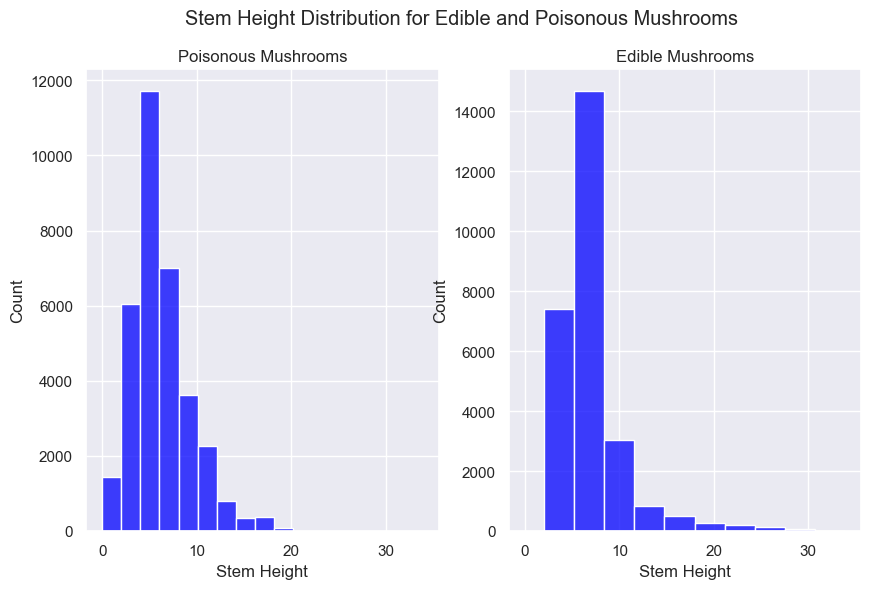

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6),sharex=True)

# Title for the entire plot
plt.suptitle('Stem Height Distribution for Edible and Poisonous Mushrooms')

# Plot for poisonous mushrooms
sns.histplot(df.loc[df['class'] == 'p', 'stem-height'], bins=10, color='blue', ax=axs[0])
axs[0].set_title('Poisonous Mushrooms')
axs[0].set_xlabel('Stem Height')

# Plot for edible mushrooms
sns.histplot(df.loc[df['class'] == 'e', 'stem-height'], bins=10, color='blue', ax=axs[1])
axs[1].set_title('Edible Mushrooms')
axs[1].set_xlabel('Stem Height')



# Display the plot
plt.show()


Insight
- It appears that there are no poisonous mushrooms in the dataset with a stem height exceeding 20 units

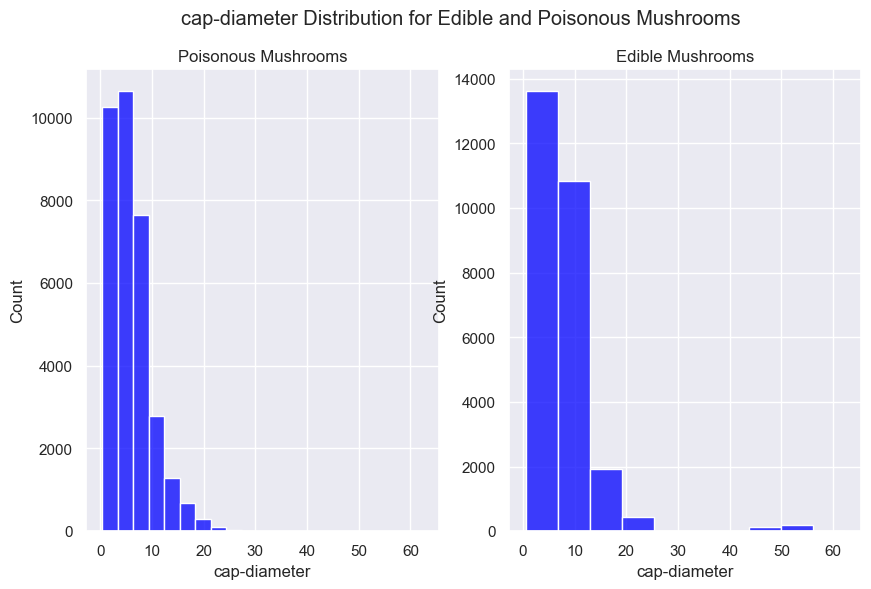

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6),sharex=True)

# Title for the entire plot
plt.suptitle('cap-diameter Distribution for Edible and Poisonous Mushrooms')

# Plot for poisonous mushrooms
sns.histplot(df.loc[df['class'] == 'p', 'cap-diameter'], bins=10, color='blue', ax=axs[0])
axs[0].set_title('Poisonous Mushrooms')
axs[0].set_xlabel('cap-diameter')

# Plot for edible mushrooms
sns.histplot(df.loc[df['class'] == 'e', 'cap-diameter'], bins=10, color='blue', ax=axs[1])
axs[1].set_title('Edible Mushrooms')
axs[1].set_xlabel('cap-diameter')



# Display the plot
plt.show()


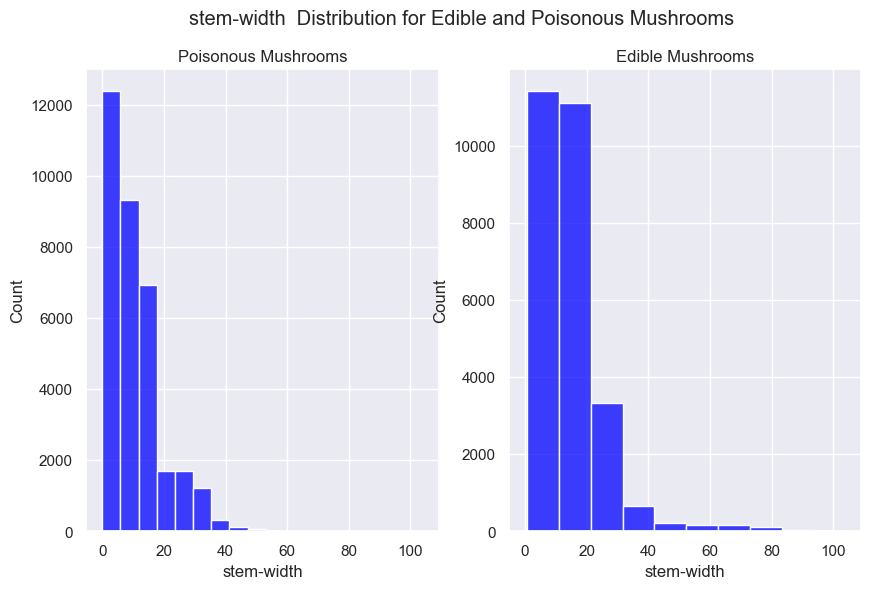

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6),sharex=True)

# Title for the entire plot
plt.suptitle('stem-width  Distribution for Edible and Poisonous Mushrooms')

# Plot for poisonous mushrooms
sns.histplot(df.loc[df['class'] == 'p', 'stem-width'], bins=10, color='blue', ax=axs[0])
axs[0].set_title('Poisonous Mushrooms')
axs[0].set_xlabel('stem-width')

# Plot for edible mushrooms
sns.histplot(df.loc[df['class'] == 'e', 'stem-width'], bins=10, color='blue', ax=axs[1])
axs[1].set_title('Edible Mushrooms')
axs[1].set_xlabel('stem-width')



# Display the plot
plt.show()


Insight
- There is no poisnous mushrooms exceeding stem-with more than 50 units.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60923 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  object 
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  object 
 3   cap-surface           60923 non-null  object 
 4   cap-color             60923 non-null  object 
 5   does-bruise-or-bleed  60923 non-null  object 
 6   gill-attachment       60923 non-null  object 
 7   gill-color            60923 non-null  object 
 8   stem-height           60923 non-null  float64
 9   stem-width            60923 non-null  float64
 10  stem-color            60923 non-null  object 
 11  has-ring              60923 non-null  object 
 12  ring-type             60923 non-null  object 
 13  habitat               60923 non-null  object 
 14  season                60923 non-null  object 
dtypes: float64(3), obje

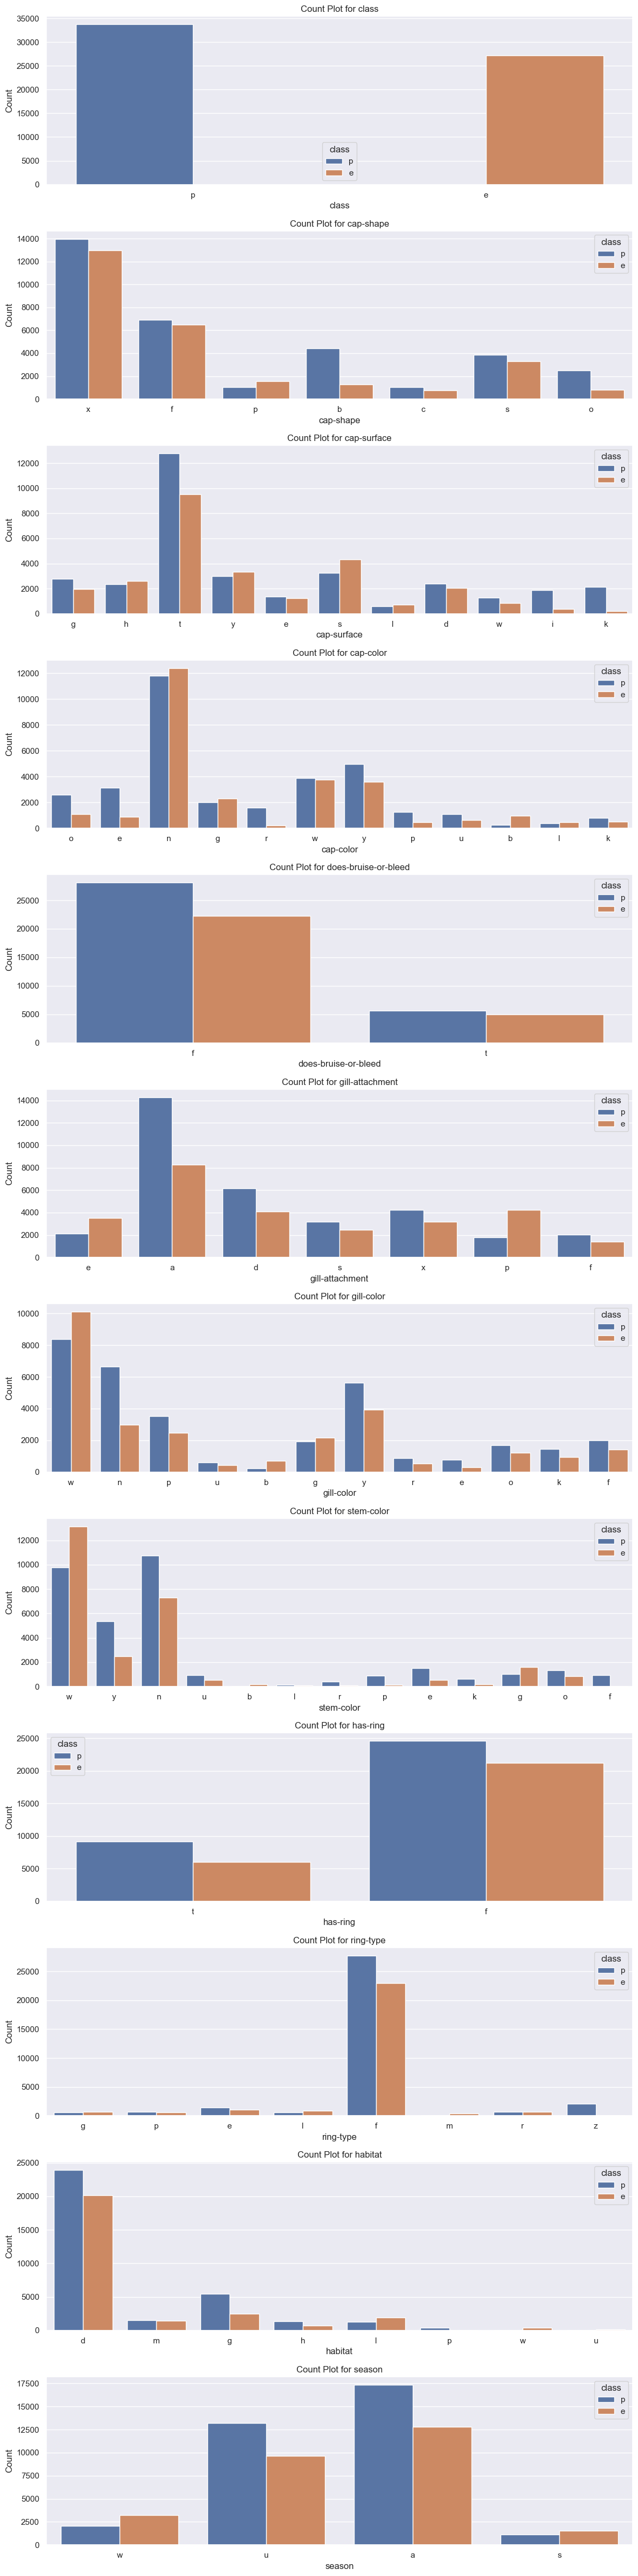

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

object_columns = df.select_dtypes(include=['object']).columns

fig, axs = plt.subplots(len(object_columns), 1, figsize=(12, 4 * len(object_columns)))

# Loop through object columns and create count plots
for i, column in enumerate(object_columns):
    sns.countplot(x=column, data=df, hue = 'class',ax=axs[i])
    axs[i].set_title(f'Count Plot for {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


Insight

Mushroom have more chances of being posinous in following cases:-
- mushroom cap shape is b(bell).
- mushroom cap surface is t(sticky).
- mushtoom gill attachment is a(adnate).
- mushroom gill color is n(brown)
- mushroom stem color is y(yellow)
- mushroom ring type is z(zone)
- mushroom habitat is p(paths)



### Bivariate Analysis

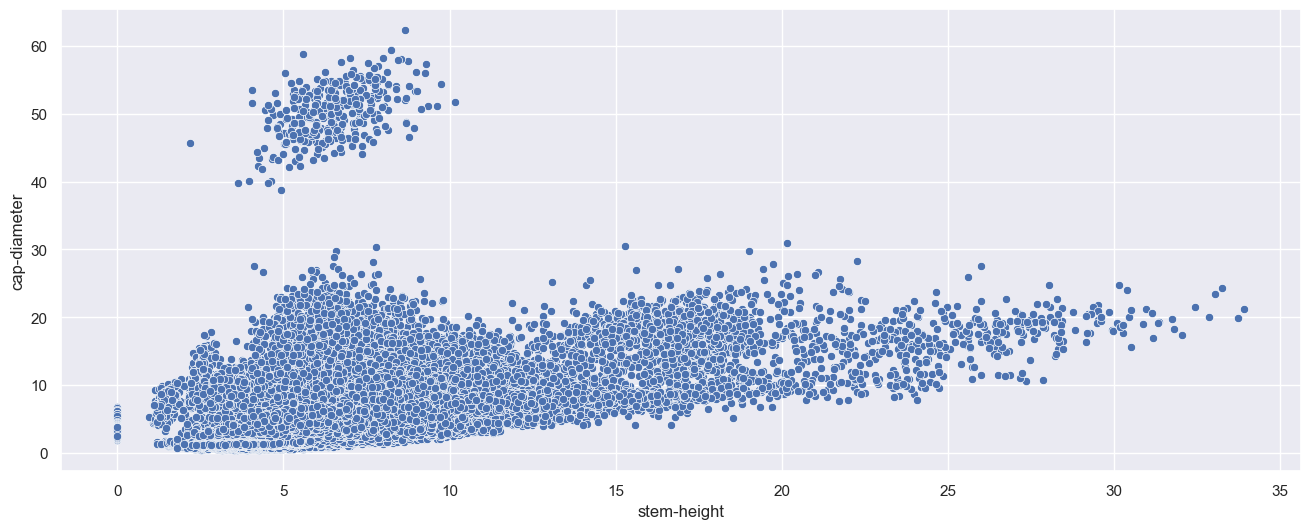

In [24]:
plt.figure(figsize = (16,6))
sns.scatterplot(x= 'stem-height', y = 'cap-diameter' , data = df)
plt.show()

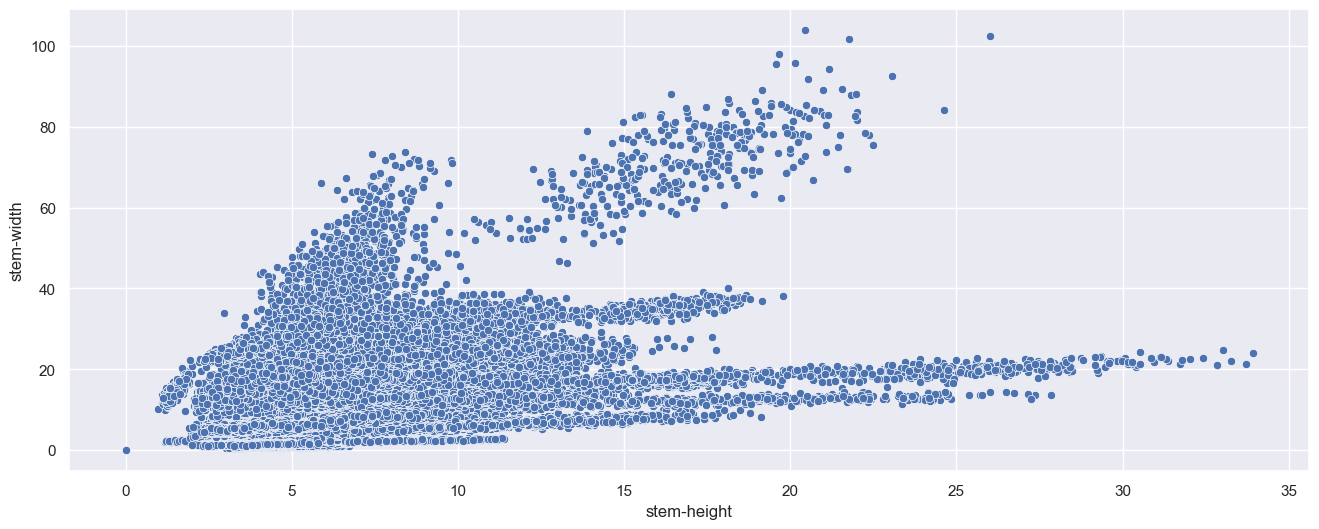

In [25]:
plt.figure(figsize = (16,6))
sns.scatterplot(x= 'stem-height', y = 'stem-width' , data = df)
plt.show()

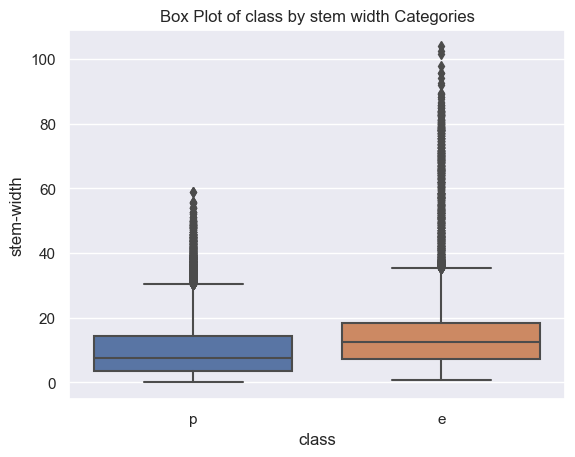

In [26]:
sns.boxplot(x='class', y='stem-width', data=df)
plt.xlabel('class')
plt.ylabel('stem-width')

plt.title('Box Plot of class by stem width Categories')
plt.show()


Insight:
- mushroom having stem-width greater than 60 are all edible

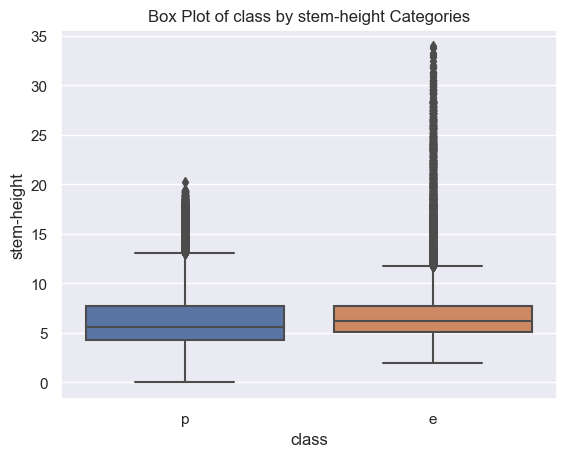

In [27]:
sns.boxplot(x='class', y='stem-height', data=df)
plt.xlabel('class')
plt.ylabel('stem-height')

plt.title('Box Plot of class by stem-height Categories')
plt.show()


Insight:
-  All mushroom having stem height greater than 20 are all edible

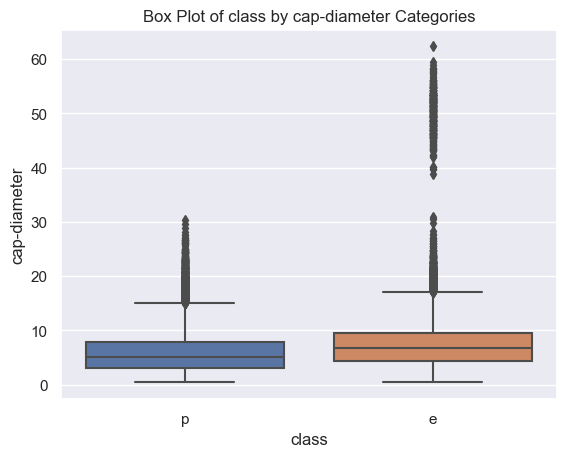

In [28]:
sns.boxplot(x='class', y='cap-diameter', data=df)
plt.xlabel('class')
plt.ylabel('cap-diameter')

plt.title('Box Plot of class by cap-diameter Categories')
plt.show()


Insight:
- All mushroom having value greater than 38 are all edible

### Multivariate Analysis

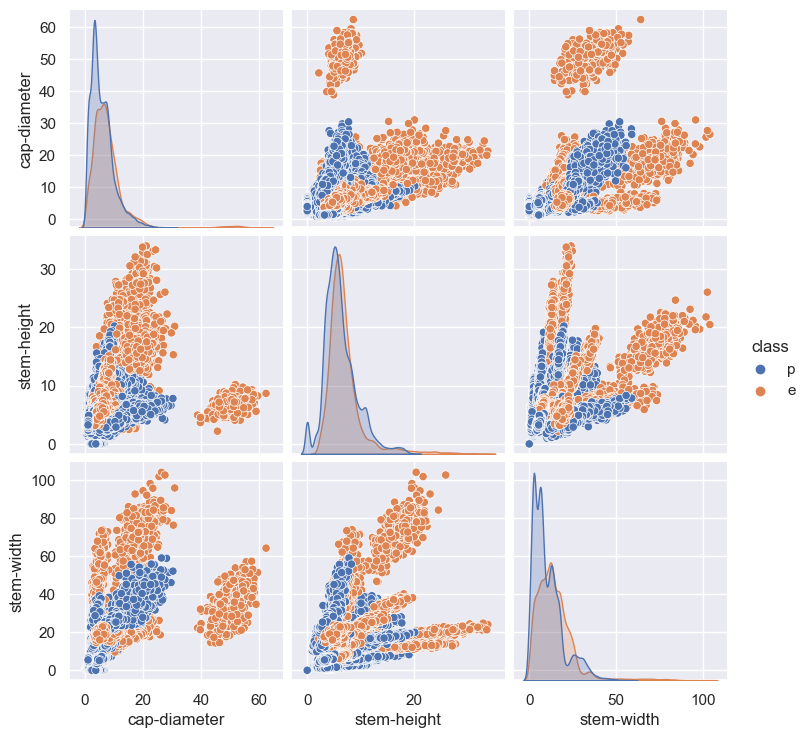

In [29]:
sns.pairplot(df, hue='class')
plt.show()

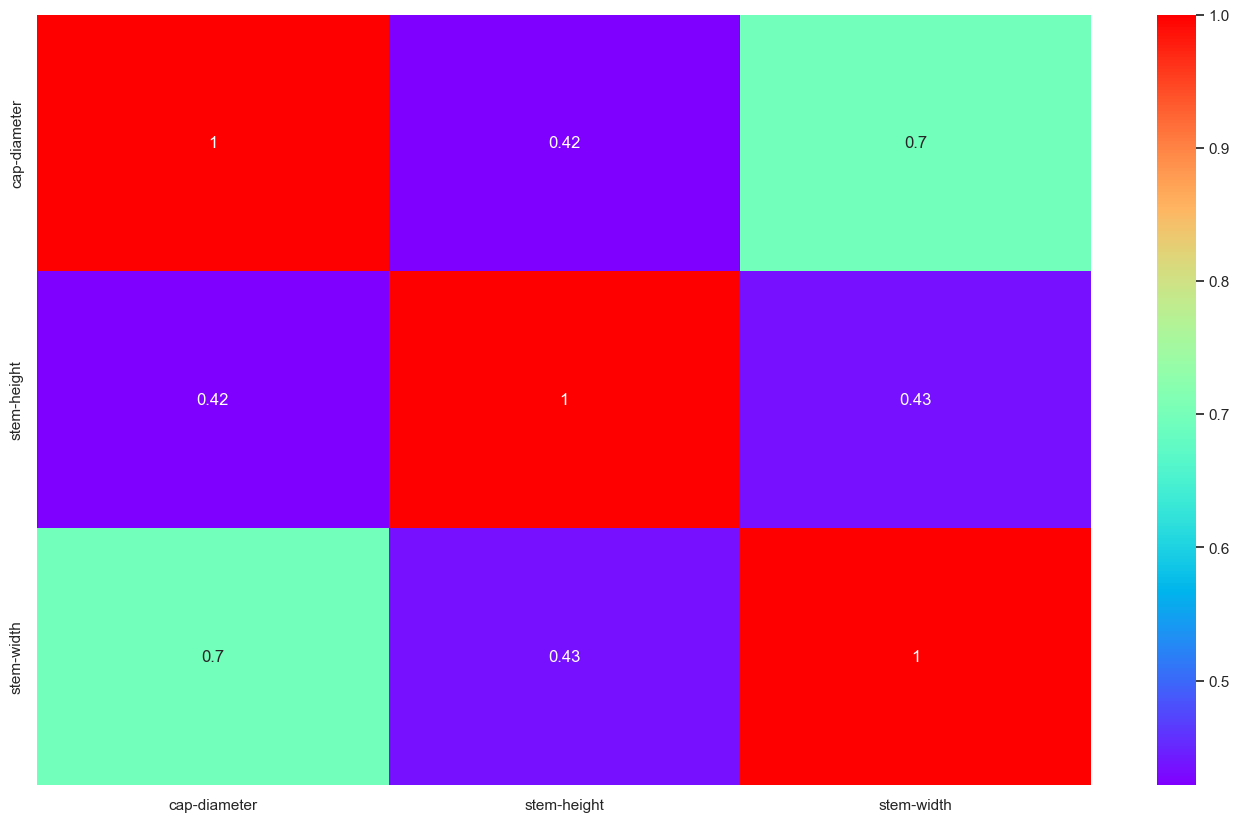

In [30]:
plt.figure(figsize =(17,10))
sns.heatmap(df.corr(),annot=True, cmap='rainbow')
plt.show()

### Outlier Detection

cap-diameter


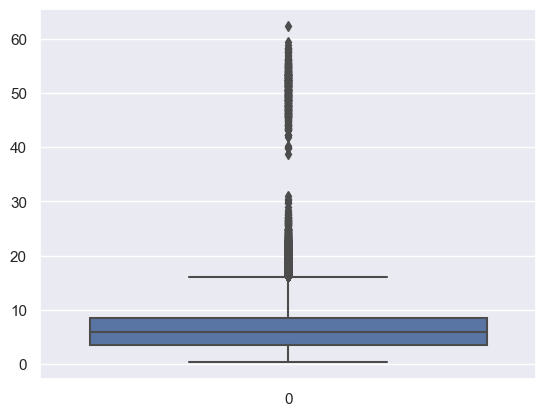

stem-height


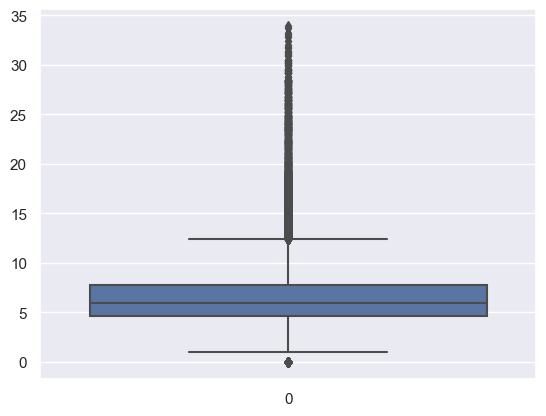

stem-width


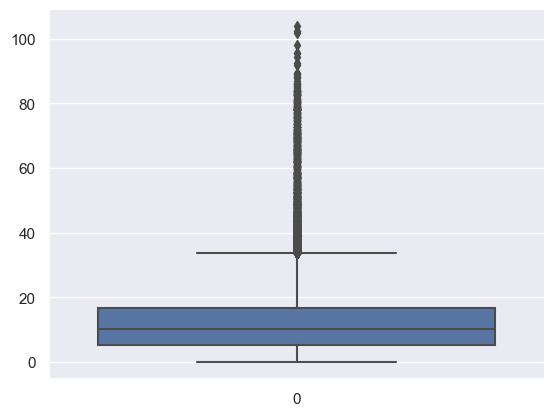

In [31]:
for i in df.columns:
    if df[i].dtype =='int64' or df[i].dtype == 'float64' :
        print(i)
        sns.boxplot(df[i])
        plt.show()

Insight: No outlier in data

### Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
col=[]
label = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'O' or df[i].dtype == 'bool':
        if df[i].nunique() <3: # for bool
            
            df[i] = label.fit_transform(df[i])
        if df[i].nunique() > 2: # for multiple value
            col.append(i)
df = pd.get_dummies(df, columns= col,drop_first=True)

In [13]:
df.columns

Index(['class', 'cap-diameter', 'does-bruise-or-bleed', 'stem-height',
       'stem-width', 'veil-type', 'has-ring', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_o',
       ...
       'habitat_g', 'habitat_h', 'habitat_l', 'habitat_m', 'habitat_p',
       'habitat_u', 'habitat_w', 'season_s', 'season_u', 'season_w'],
      dtype='object', length=104)

In [15]:
df.shape

(61069, 104)

### Spliting Data in dependend and independent variable

In [33]:
x = df.drop('class',axis = 1)
y = df['class']

### Splitting Data in Train and Test

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(45692, 78) (15231, 78) (45692,) (15231,)


### Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

df_x_train = pd.DataFrame(data= x_train_sc,columns = x_train.columns)
df_x_test = pd.DataFrame(data= x_test_sc,columns = x_test.columns)

### Model Building

### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(x_train_sc, y_train)
y_pred_train_rfc = rfc.predict(x_train_sc)
Train_acc = accuracy_score(y_train, y_pred_train_rfc)
y_pred_test_rfc = rfc.predict(x_test_sc)
Test_acc = accuracy_score(y_test, y_pred_test_rfc)
print(f'Train_Accuracy :{Train_acc.round(2)*100} %, \nTest_Accuracy :{Test_acc.round(2)*100} %')

Train_Accuracy :100.0 %, 
Test_Accuracy :100.0 %


In [37]:
# Cross Validation approach
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rfc, x_train_sc, y_train, cv=10)
test_accuracy = cross_val_score(rfc, x_test_sc, y_test, cv=10)
print(training_accuracy.mean())
print()
print(test_accuracy.mean())


0.9988400758033997

0.9986211855658557


In [38]:
# calculating feature importance
importance = rfc.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07527
Feature: 1, Score: 0.02951
Feature: 2, Score: 0.07846
Feature: 3, Score: 0.10808
Feature: 4, Score: 0.02223
Feature: 5, Score: 0.00943
Feature: 6, Score: 0.01226
Feature: 7, Score: 0.00740
Feature: 8, Score: 0.00400
Feature: 9, Score: 0.00842
Feature: 10, Score: 0.02100
Feature: 11, Score: 0.01144
Feature: 12, Score: 0.01882
Feature: 13, Score: 0.00955
Feature: 14, Score: 0.00862
Feature: 15, Score: 0.01210
Feature: 16, Score: 0.00387
Feature: 17, Score: 0.01612
Feature: 18, Score: 0.02174
Feature: 19, Score: 0.00629
Feature: 20, Score: 0.01520
Feature: 21, Score: 0.01236
Feature: 22, Score: 0.00813
Feature: 23, Score: 0.00194
Feature: 24, Score: 0.00116
Feature: 25, Score: 0.01576
Feature: 26, Score: 0.00596
Feature: 27, Score: 0.00490
Feature: 28, Score: 0.01077
Feature: 29, Score: 0.00383
Feature: 30, Score: 0.00882
Feature: 31, Score: 0.00896
Feature: 32, Score: 0.01965
Feature: 33, Score: 0.01483
Feature: 34, Score: 0.00902
Feature: 35, Score: 0.02717
Fe

<Axes: >

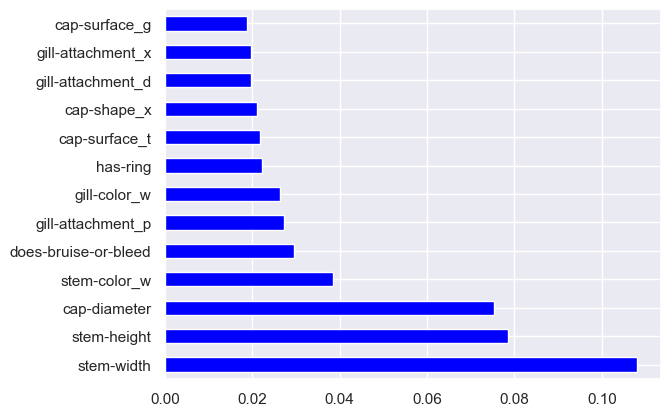

In [39]:
# plotting horizontal bar graph for importance
index= x.columns
importance = pd.Series(rfc.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

Insight:
    - stem width, stem height and cap diameter are the most imp features for classification. 

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(y_train, y_pred_train_rfc))
print("****************"*5)
print(classification_report(y_test, y_pred_test_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20312
           1       1.00      1.00      1.00     25380

    accuracy                           1.00     45692
   macro avg       1.00      1.00      1.00     45692
weighted avg       1.00      1.00      1.00     45692

********************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6869
           1       1.00      1.00      1.00      8362

    accuracy                           1.00     15231
   macro avg       1.00      1.00      1.00     15231
weighted avg       1.00      1.00      1.00     15231



In [41]:
print(confusion_matrix(y_train, y_pred_train_rfc))
print("****************"*5)
print(confusion_matrix(y_test, y_pred_test_rfc))

[[20312     0]
 [    0 25380]]
********************************************************************************
[[6862    7]
 [   3 8359]]


### Conclusion

Successful build a model for classification with 99% train and test accuracy , stem-width and stem-height are the most important features that are used for classification